In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import response
import requests
import io

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

In [65]:
studentData = pd.read_csv(r'C:\Users\user\Downloads\studentData.csv')

In [66]:
studentData

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [67]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [68]:
studentData.duplicated().sum()

0

In [69]:
studentData.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [70]:
def gradeClassifier(datacol,threshold):
    
    res = []
    for score in datacol:
        if score < threshold:
            res.append('F')
        else:
            res.append('P')
    return res

In [71]:
#generate a categorical coumn for G3
studentData['G1Status'] = gradeClassifier(studentData['G1'], 10)
studentData['G2Status'] = gradeClassifier(studentData['G2'], 10)
studentData['G3Status'] = gradeClassifier(studentData['G3'], 10)

In [72]:
df = studentData.drop(['G1','G2','G3'],axis =1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1Status,G2Status,G3Status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,F,F,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,F,F,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,F,F,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,P,P,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,F,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,F,F,F
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,P,P,P
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,P,F,F
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,P,P,P


In [73]:
#list comprehension for splitting data into categorical and numerical
catDf = df[[x for x in df.columns if df[x].dtype == 'object']]
numDf = df[[x for x in df.columns if df[x].dtype != 'object']]

### Treating for Numerical Columns

In [74]:
numDf

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,4,4,2,2,0,4,3,4,1,1,3,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4
2,15,1,1,1,2,3,4,3,2,2,3,3,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2
4,16,3,3,1,2,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11
391,17,3,1,2,1,0,2,4,5,3,4,2,3
392,21,1,1,1,1,3,5,5,3,3,3,3,3
393,18,3,2,3,1,0,4,4,1,3,4,5,0


In [75]:
def intQtlRng(col):
    q3, q1 = np.percentile(col, [75, 25])
    iqr = q3 - q1
    upper_lim = q3 + 1.5 * iqr
    lower_lim = q1 - 1.5 * iqr
    return upper_lim, lower_lim

outlierCols = []
for col in numDf.columns:
    if col != 'id':
        print("-------------------------------------------------------------")

        print(f'Outlier statistics for {col} column')
        UL, LL = intQtlRng(numDf[col])

        print(f'upper limit is {UL}')
        print(f'lower limit is {LL}')

        total_outliers = len(numDf.loc[numDf[col] < LL, col]) + len(numDf.loc[numDf[col] > UL, col])
        percent_outlier = (total_outliers/len(numDf.index))*100
        print('percentage of outliers in: %s is (%.1f%%)' % (col, percent_outlier))
        print("---------------------------------------------------------------") 

        if percent_outlier > 0:
            print(f'heavy prsence of outlier in {col}')
            outlierCols.append(col)
        print("---------------------------------------------------------------") 

skewed =numDf.skew()      
print(f'Skewness for Numerical Data:\n {skewed}.')
print("---------------------------------------------------------------")

-------------------------------------------------------------
Outlier statistics for age column
upper limit is 21.0
lower limit is 13.0
percentage of outliers in: age is (0.3%)
---------------------------------------------------------------
heavy prsence of outlier in age
---------------------------------------------------------------
-------------------------------------------------------------
Outlier statistics for Medu column
upper limit is 7.0
lower limit is -1.0
percentage of outliers in: Medu is (0.0%)
---------------------------------------------------------------
---------------------------------------------------------------
-------------------------------------------------------------
Outlier statistics for Fedu column
upper limit is 4.5
lower limit is 0.5
percentage of outliers in: Fedu is (0.5%)
---------------------------------------------------------------
heavy prsence of outlier in Fedu
---------------------------------------------------------------
-------------------

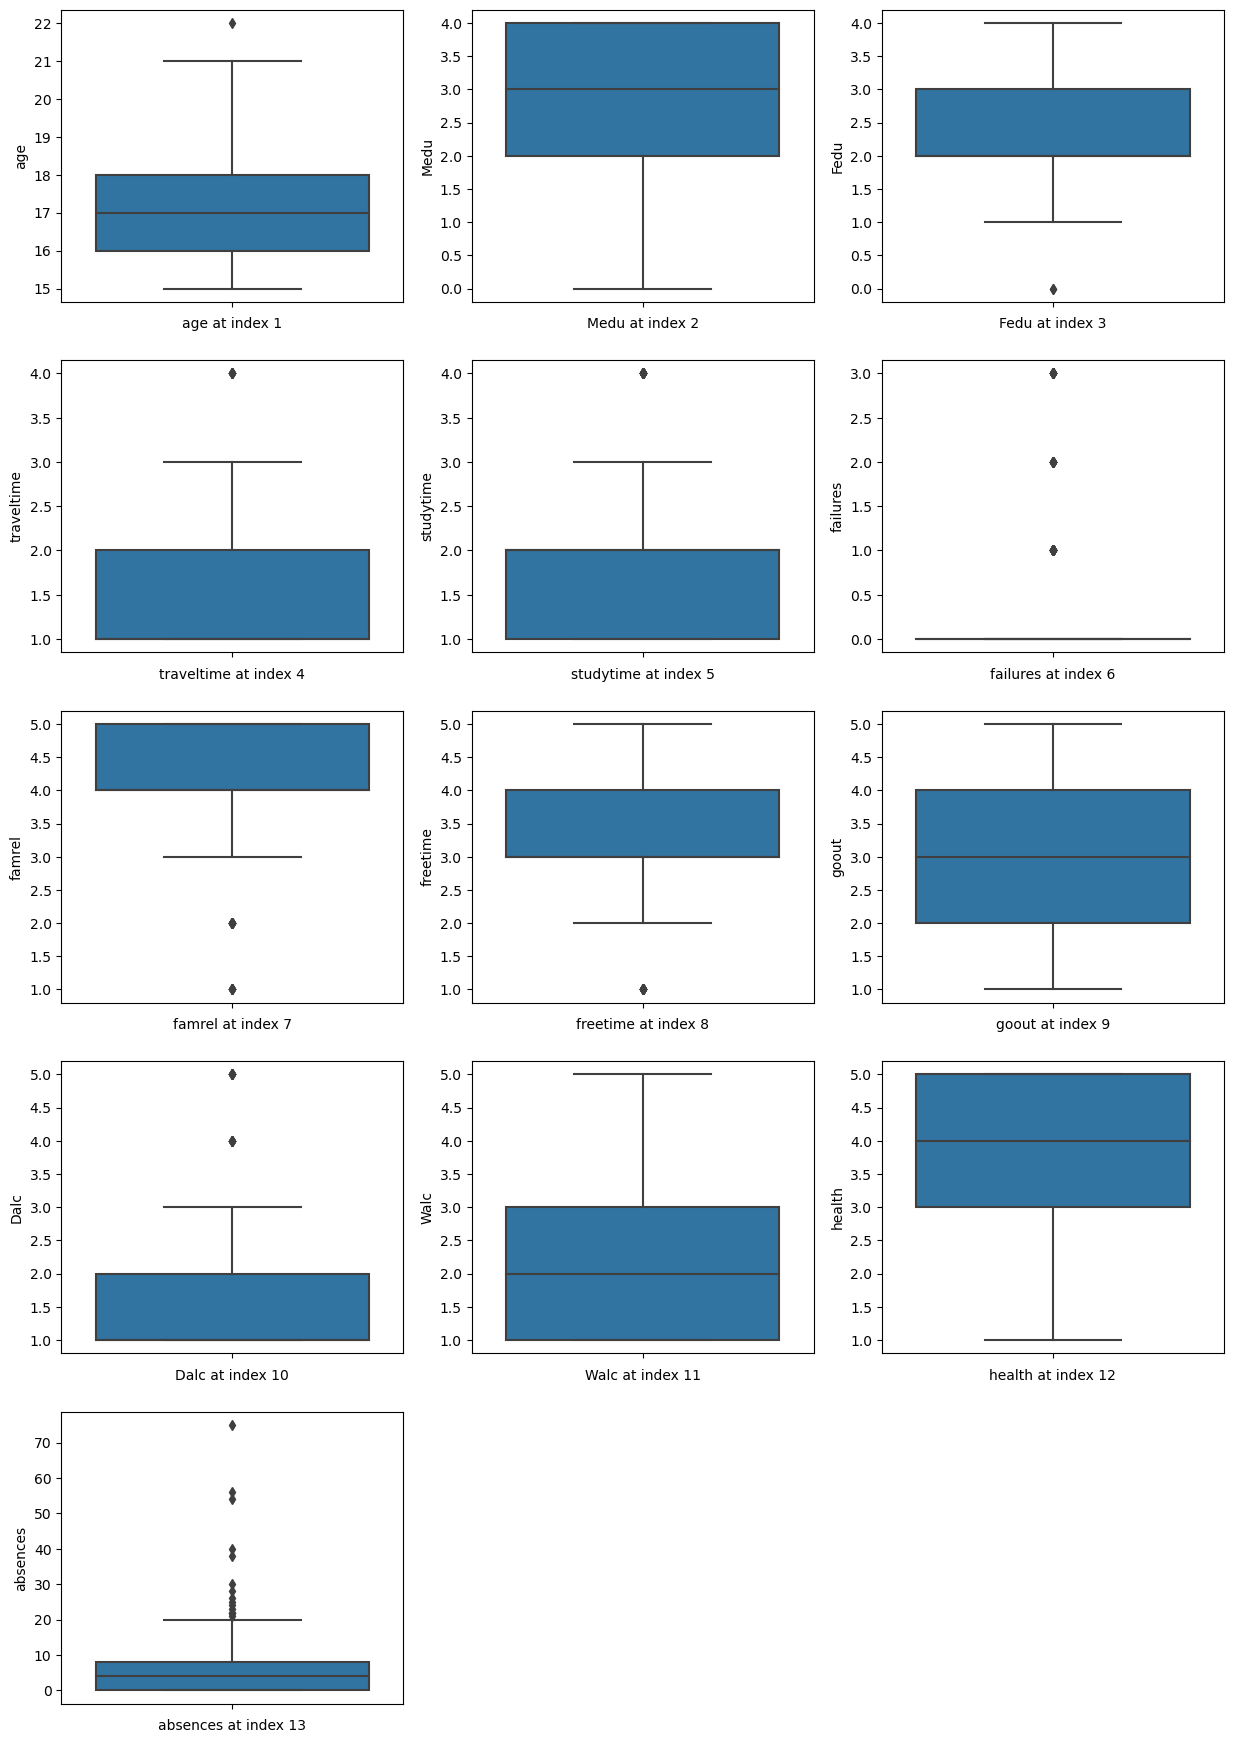

In [76]:
#code to inspect numeric features for outliers
i = 1

plt.figure(figsize=(15,22))
for col in numDf.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=col, data=numDf)
    plt.xlabel(f"{col} at index {i}")
    i+=1
plt.show()

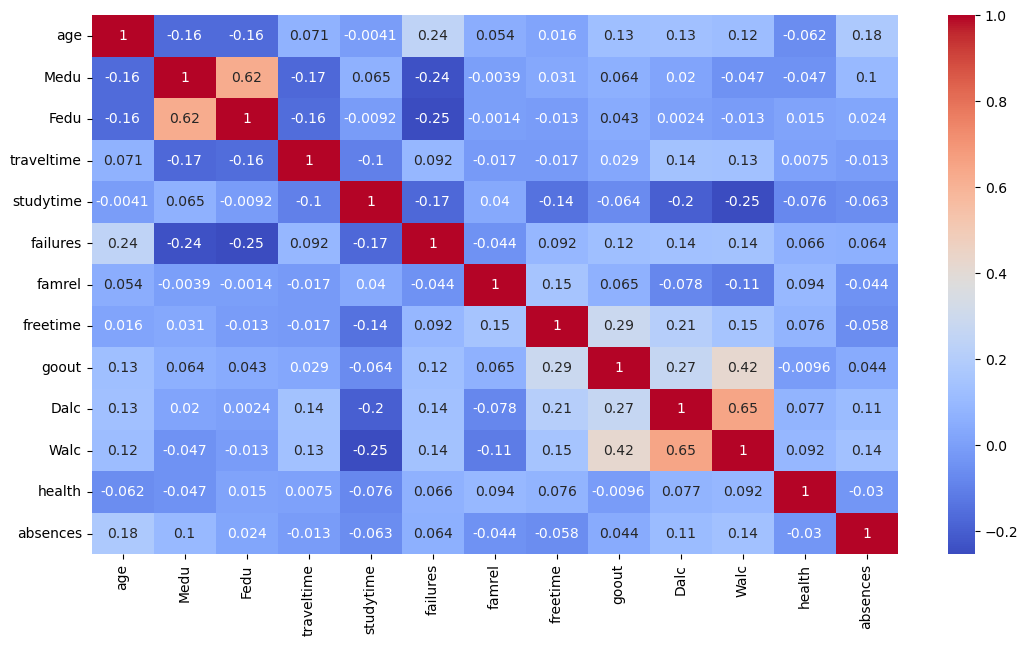

In [77]:
# Calculate the correlation matrix
correlation_matrix = numDf.corr()
plt.figure(figsize=(13,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [78]:
df.shape

(395, 33)

In [79]:
# Remove outliers by setting values outside IQR limits to NaN
dF = df.copy()
for col in outlierCols:
    UL, LL = intQtlRng(dF[col])
    dF.loc[dF[col] < LL, col] = np.nan
    dF.loc[dF[col] > UL, col] = np.nan

# Drop rows with missing values due to outliers
dF.dropna(subset=outlierCols, inplace=True)

# Step 5: Split cleaned data into categorical and numerical sets again

catDF = dF[[x for x in dF.columns if dF[x].dtype == 'object']]
numDF = dF[[x for x in dF.columns if dF[x].dtype != 'object']]   


  # Log transform to reduce skewness in numerical columns
skew_threshold = 1  # Set threshold for skewness
for col in numDF.columns:
    if numDF[col].skew() > skew_threshold:
        numDF[col] = np.log1p(numDF[col])  # log1p is used to handle zeros in data
        print(f"Log transformation applied to {col} due to high skewness.")
#numDF = np.log1p(numDF)

Log transformation applied to traveltime due to high skewness.
Log transformation applied to Dalc due to high skewness.
Log transformation applied to absences due to high skewness.


C:\Users\user\AppData\Local\Temp\ipykernel_12684\1845086588.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDF[col] = np.log1p(numDF[col])  # log1p is used to handle zeros in data


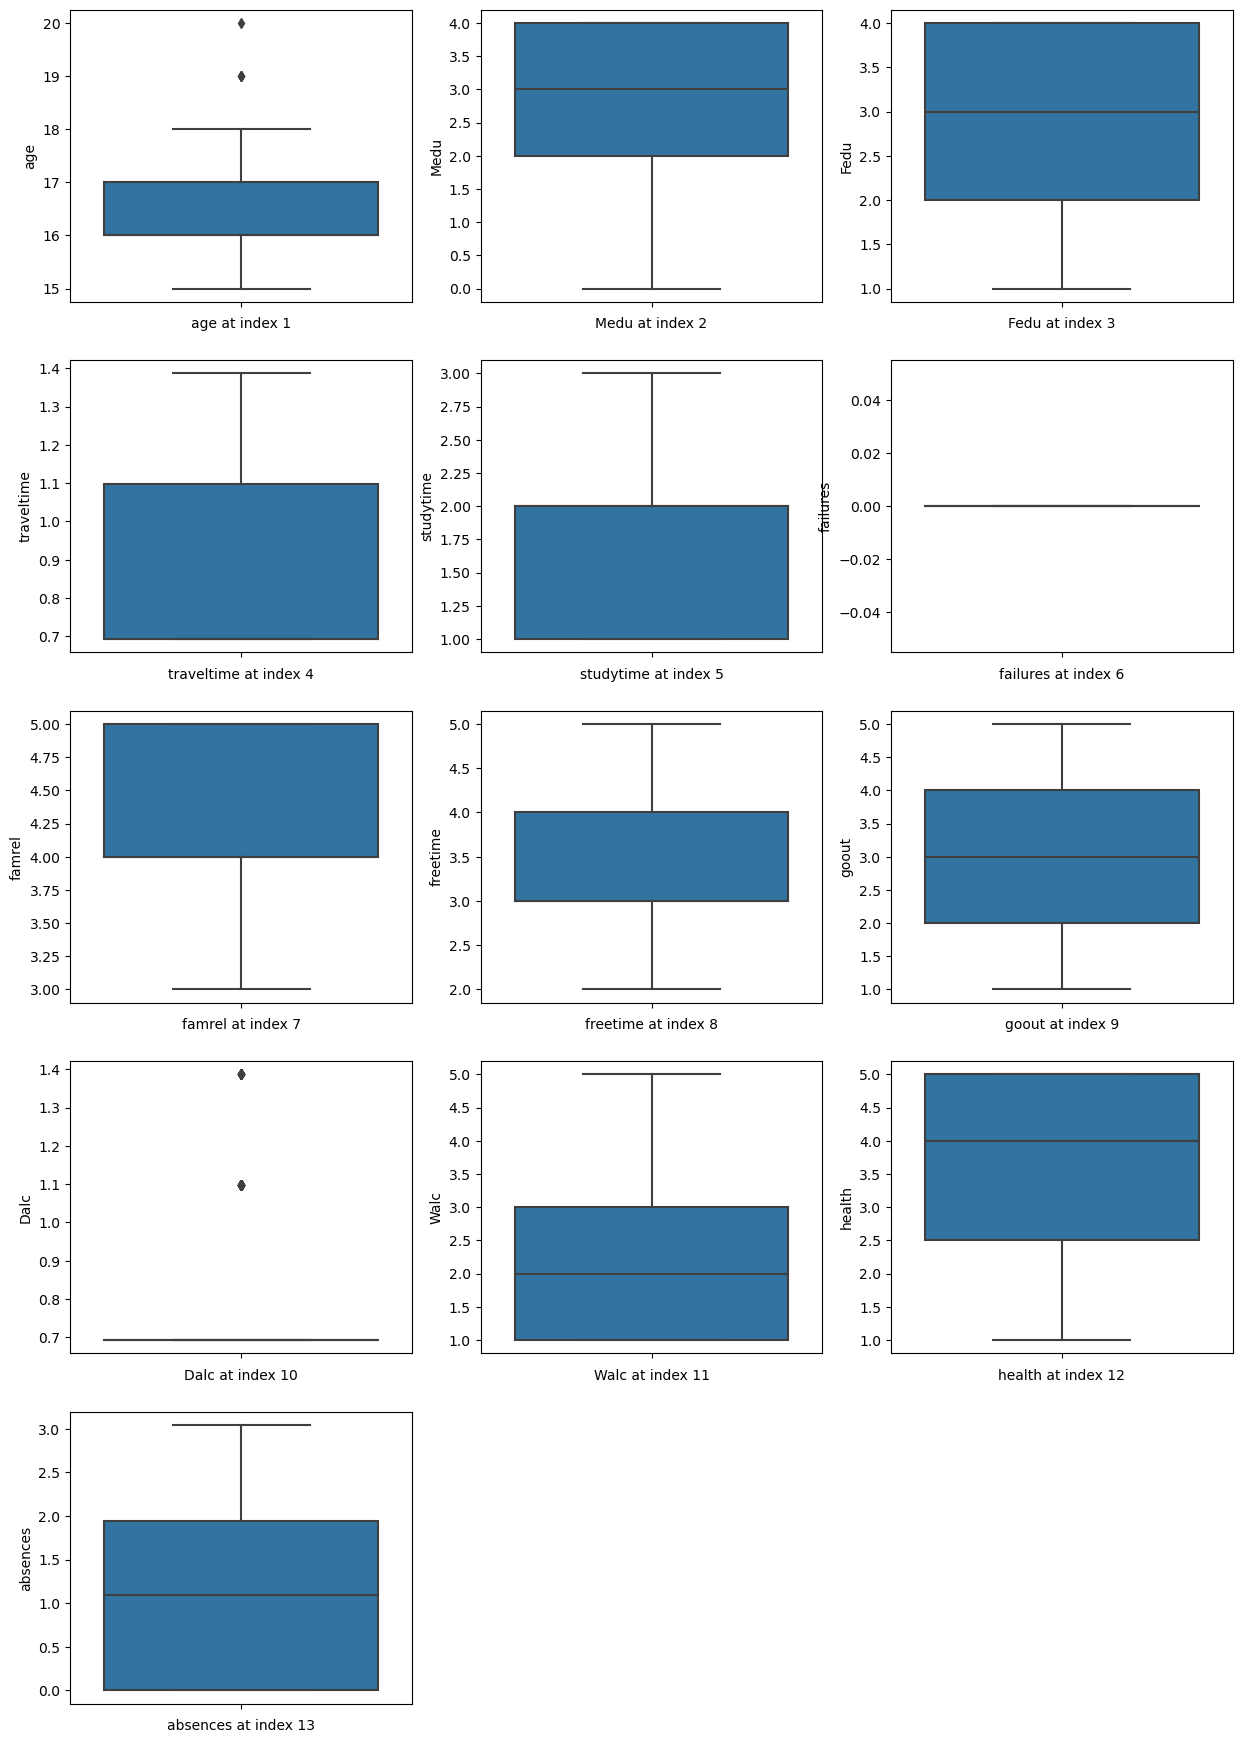

In [80]:
#code to inspect numeric features for outliers
i = 1

plt.figure(figsize=(15,22))
for col in numDF.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=col, data=numDF)
    plt.xlabel(f"{col} at index {i}")
    i+=1
plt.show()

In [81]:
numDF.skew()

age           0.227781
Medu         -0.426735
Fedu         -0.189693
traveltime    1.215499
studytime     0.054938
failures      0.000000
famrel       -0.171889
freetime      0.224387
goout         0.191716
Dalc          1.680466
Walc          0.645430
health       -0.478459
absences      0.001276
dtype: float64

### Treating for Categorical Columns

In [82]:
# : Display unique values and value counts for categorical columns
for col in catDF.columns:
    print(col,"==", df[col].nunique(),'Unique labels', '\n',df[col].unique())# Print unique values in the categorical column


school == 2 Unique labels 
 ['GP' 'MS']
sex == 2 Unique labels 
 ['F' 'M']
address == 2 Unique labels 
 ['U' 'R']
famsize == 2 Unique labels 
 ['GT3' 'LE3']
Pstatus == 2 Unique labels 
 ['A' 'T']
Mjob == 5 Unique labels 
 ['at_home' 'health' 'other' 'services' 'teacher']
Fjob == 5 Unique labels 
 ['teacher' 'other' 'services' 'health' 'at_home']
reason == 4 Unique labels 
 ['course' 'other' 'home' 'reputation']
guardian == 3 Unique labels 
 ['mother' 'father' 'other']
schoolsup == 2 Unique labels 
 ['yes' 'no']
famsup == 2 Unique labels 
 ['no' 'yes']
paid == 2 Unique labels 
 ['no' 'yes']
activities == 2 Unique labels 
 ['no' 'yes']
nursery == 2 Unique labels 
 ['yes' 'no']
higher == 2 Unique labels 
 ['yes' 'no']
internet == 2 Unique labels 
 ['no' 'yes']
romantic == 2 Unique labels 
 ['no' 'yes']
G1Status == 2 Unique labels 
 ['F' 'P']
G2Status == 2 Unique labels 
 ['F' 'P']
G3Status == 2 Unique labels 
 ['F' 'P']


In [83]:
# Encode categorical columns using Label encoding 
encoder = LabelEncoder()
for col in catDF:
    catDF[col] = encoder.fit_transform(catDF[col])


# : Combine numerical and encoded categorical columns with target column
numDF = numDF.reset_index(drop=True)  # Reset index for concatenation
catDFNew = catDF.reset_index(drop=True)  # Reset index for concatenation
dF = pd.concat([numDF, catDFNew], axis=1)

print(dF.shape)

dF

(239, 33)


C:\Users\user\AppData\Local\Temp\ipykernel_12684\2843091942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDF[col] = encoder.fit_transform(catDF[col])
C:\Users\user\AppData\Local\Temp\ipykernel_12684\2843091942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDF[col] = encoder.fit_transform(catDF[col])
C:\Users\user\AppData\Local\Temp\ipykernel_12684\2843091942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsup,paid,activities,nursery,higher,internet,romantic,G1Status,G2Status,G3Status
0,18.0,4,4.0,1.098612,2.0,0.0,4.0,3.0,4,0.693147,...,0,0,0,1,1,0,0,0,0,0
1,17.0,1,1.0,0.693147,2.0,0.0,5.0,3.0,3,0.693147,...,1,0,0,0,1,1,0,0,0,0
2,15.0,4,2.0,0.693147,3.0,0.0,3.0,2.0,2,0.693147,...,1,1,1,1,1,1,1,1,1,1
3,16.0,3,3.0,0.693147,2.0,0.0,4.0,3.0,2,0.693147,...,1,1,0,1,1,0,0,0,1,1
4,16.0,4,3.0,0.693147,2.0,0.0,5.0,4.0,2,0.693147,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,18.0,2,2.0,1.098612,3.0,0.0,5.0,3.0,3,0.693147,...,0,1,0,1,1,0,0,1,0,1
235,18.0,4,4.0,1.386294,1.0,0.0,4.0,4.0,3,1.098612,...,1,1,1,1,1,1,1,0,0,0
236,18.0,3,1.0,0.693147,2.0,0.0,4.0,3.0,4,0.693147,...,1,1,0,1,1,1,0,0,0,0
237,18.0,3,2.0,1.386294,1.0,0.0,4.0,4.0,1,1.386294,...,0,0,0,0,1,1,0,1,1,1


### Feature selection

In [84]:
def featureSelector(df, k):
    
    # Define the number of features in the dataset
    #n = len(df.columns)  # Total number of columns (features + target)
    #k = n // 2           # Number of features to select (half of the total columns)
    #m = n - 1            # Index of the last feature column (before the target column)

    # Separate the independent features (X) and the target variable (y)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    
    model = input('write wheather the model follows a LinearRegression or LogicalRegression :', )
    
    if model == 'LinearRegression':
        # Initialize the model (Linear Regression in this case)
        model = LinearRegression()

        # Apply Recursive Feature Elimination (RFE)
        rfeSelector = RFE(estimator=model, n_features_to_select=k)
        rfeSelector.fit(X, y)

        # Initialize an empty list to store the names of selected features
        feats = []

        # Loop through features and selection status
        for feat, is_selected in zip(df.columns[:-1], rfeSelector.support_):
            if is_selected:  # If the feature is selected, add it to the list
                feats.append(feat)
                
        # Create a DataFrame with the selected features
        df_selected = df[feats]

        # Add the target variable back to the selected features DataFrame
        ydf = pd.DataFrame(y, columns=[df.columns[-1]])
        df_selected = pd.concat([df_selected, ydf], axis=1)

        y = df_selected.iloc[: ,-1]
        X = df_selected.iloc[:, :-1]


        feature_names = list(df_selected.columns)[:-1]

        model = ExtraTreesRegressor()

        model.fit(X,y)

        #plot graph of feature importances for better visualization
        feat_importances=pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(k).plot(kind='barh')
        plt.show()
    
    
    else:                          # Initialize the model (Logistic Regression in this case)
        model = LogisticRegression()

        # Apply Recursive Feature Elimination (RFE)
        rfeSelector = RFE(estimator=model, n_features_to_select=k)
        rfeSelector.fit(X, y)

        # Initialize an empty list to store the names of selected features
        feats = []

        # Loop through features and selection status
        for feat, is_selected in zip(df.columns[:-1], rfeSelector.support_):
            if is_selected:  # If the feature is selected, add it to the list
                feats.append(feat)

        # Create a DataFrame with the selected features
        df_selected = df[feats]

        # Add the target variable back to the selected features DataFrame
        ydf = pd.DataFrame(y, columns=[df.columns[-1]])
        df_selected = pd.concat([df_selected, ydf], axis=1)

        y = df_selected.iloc[: ,-1]
        X = df_selected.iloc[:, :-1]


        feature_names = list(df_selected.columns)[:-1]

        model = ExtraTreesClassifier()

        model.fit(X,y)

        #plot graph of feature importances for better visualization
        feat_importances=pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(k).plot(kind='barh')
        plt.show()
        
    return df_selected


write wheather the model follows a LinearRegression or LogicalRegression :LogisticRegression


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

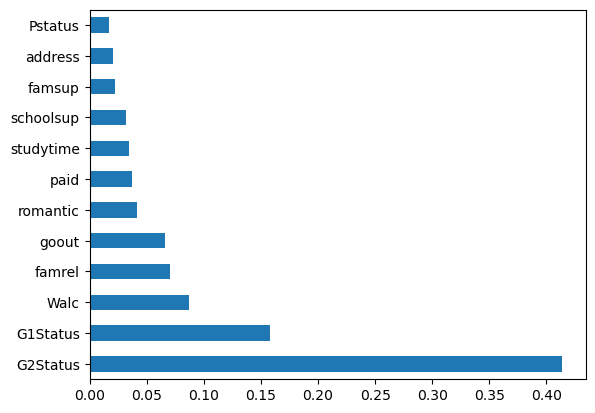

In [85]:
dF1 = featureSelector(dF, 12)

In [86]:
dF1

,studytime,famrel,goout,Walc,address,Pstatus,schoolsup,famsup,paid,romantic,G1Status,G2Status,G3Status
0,2.0,4.0,4,1,1,0,1,0,0,0,0,0,0
1,2.0,5.0,3,1,1,1,0,1,0,0,0,0,0
2,3.0,3.0,2,1,1,1,0,1,1,1,1,1,1
3,2.0,4.0,2,2,1,1,0,1,1,0,0,1,1
4,2.0,5.0,2,2,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,3.0,5.0,3,3,0,1,0,0,1,0,1,0,1
235,1.0,4.0,3,2,0,1,0,1,1,1,0,0,0
236,2.0,4.0,4,1,1,1,0,1,1,0,0,0,0
237,1.0,4.0,1,4,0,1,0,0,0,0,1,1,1


# Goal : Predict wheather a student pass or fail the finial G3 math exams

In [87]:
X = dF1.drop('G3Status', axis =1)
y = dF1.G3Status

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Preprocess the data: scale and normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred_log_reg = model.predict(X_test)\

accScore = accuracy_score(y_test, y_pred_log_reg)
print(accScore)
print('-------------------------------------------------------------------------------------------------')
report = classification_report(y_test,y_pred_log_reg)
print(report)
print('-------------------------------------------------------------------------------------------------')


# Decision Tree Classifier
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

y_pred_tree = model1.predict(X_test)


accScore1 = accuracy_score(y_test,y_pred_tree)
print(accScore1)
print('-------------------------------------------------------------------------------------------------')
report1 = classification_report(y_test,y_pred_tree)
print(report1)
print('-------------------------------------------------------------------------------------------------')


# Random Forest Classifier
model2 = RandomForestClassifier(n_estimators= 100, random_state =42 )
model2.fit(X_train,y_train)

y_pred_forest = model2.predict(X_test)

accScore2 = accuracy_score(y_test,y_pred_forest)
print(accScore2)
print('-------------------------------------------------------------------------------------------------')
report2 = classification_report(y_test,y_pred_forest)
print(report2)
print('-------------------------------------------------------------------------------------------------')


0.9375
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.92      1.00      0.96        36

    accuracy                           0.94        48
   macro avg       0.96      0.88      0.91        48
weighted avg       0.94      0.94      0.93        48

-------------------------------------------------------------------------------------------------
0.7708333333333334
-------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.82      0.89      0.85        36

    accuracy                           0.77        48
   macro avg       0.69      0.65      0.66        48
weighted avg       0.75      0.77      0.76        48

--------------------------

In [90]:
y_pred_proba = model.predict_proba(X_test)[:,1]

#calculate AUC-Roc score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score : {auc_score}")

AUC-ROC Score : 0.900462962962963


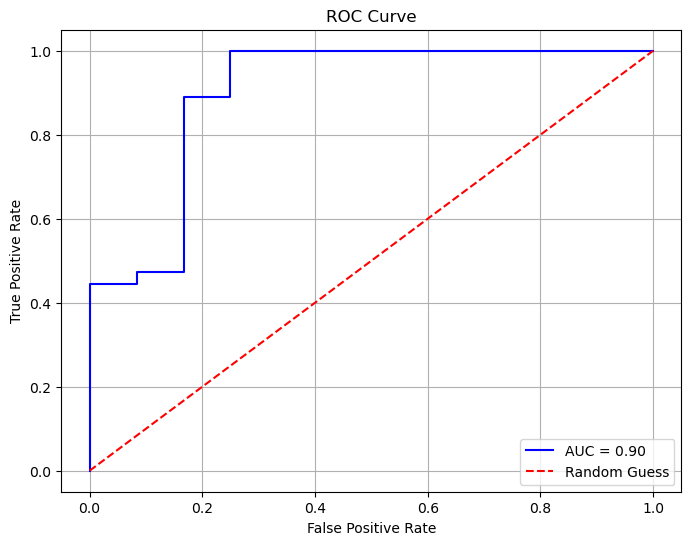

In [91]:
# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## check out the function code beneath the notebook

### The function code does the following:

Trains and evaluates multiple classification models on the provided dataset. 
Returns a styled DataFrame that displays precision, recall, and accuracy 
for each class (for both binary and multiclass classification) along with the model names.

Parameters:
X (DataFrame or array-like): The input features for the classification task.
y (Series or array-like): The target labels for the classification task.

Returns:
styled_results (pd.io.formats.style.Styler): A styled DataFrame showing the precision, recall, 
and accuracy for each model, with highlights for the best values.
"""

input your test_size as range between 1 -100: 20


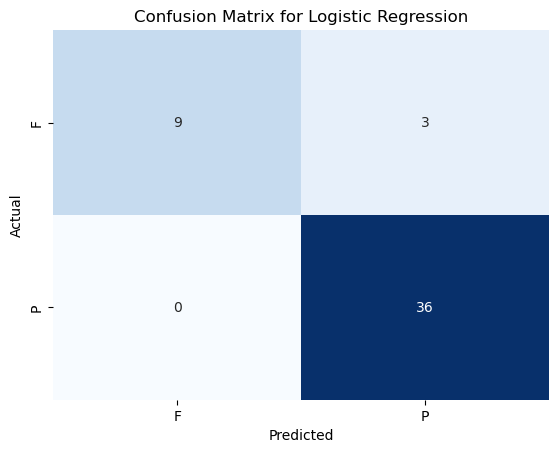

CLASSIFICATION REPORT FOR:  Logistic Regression
              precision    recall  f1-score   support

           F       1.00      0.75      0.86        12
           P       0.92      1.00      0.96        36

    accuracy                           0.94        48
   macro avg       0.96      0.88      0.91        48
weighted avg       0.94      0.94      0.93        48



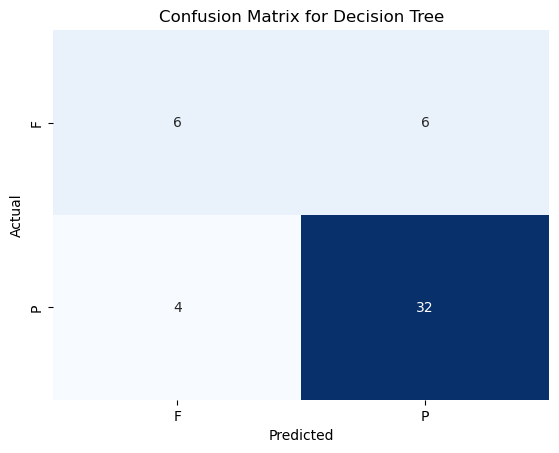

CLASSIFICATION REPORT FOR:  Decision Tree
              precision    recall  f1-score   support

           F       0.60      0.50      0.55        12
           P       0.84      0.89      0.86        36

    accuracy                           0.79        48
   macro avg       0.72      0.69      0.71        48
weighted avg       0.78      0.79      0.79        48



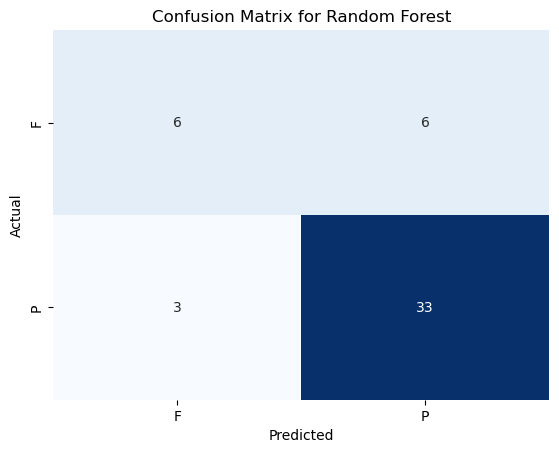

CLASSIFICATION REPORT FOR:  Random Forest
              precision    recall  f1-score   support

           F       0.67      0.50      0.57        12
           P       0.85      0.92      0.88        36

    accuracy                           0.81        48
   macro avg       0.76      0.71      0.73        48
weighted avg       0.80      0.81      0.80        48

best performing model is: Logistic Regression and score is:  0.9375


,Model,Accuracy,F Precision,F Recall,P Precision,P Recall
0,Logistic Regression,0.937500,1.000000,0.750000,0.923077,1.000000
1,Decision Tree,0.791667,0.600000,0.500000,0.842105,0.888889
2,Random Forest,0.812500,0.666667,0.500000,0.846154,0.916667


In [93]:
outcome = classModels(X,y)
outcome

In [ ]:
outcome

In [62]:
testDf = pd.DataFrame(X_test, columns =['studytime', 'famrel', 'goout', 'Walc', 'address', 'Pstatus',
       'schoolsup', 'famsup', 'paid', 'romantic', 'G1Status', 'G2Status'])


testDf['G3test'] = list(y_test)
testDf['G3_LogisticPredictions'] = list(y_pred_log_reg)
testDf

,studytime,famrel,goout,Walc,address,Pstatus,schoolsup,famsup,paid,romantic,G1Status,G2Status,G3test,G3_LogisticPredictions
24,2.0,4.0,1,1,1,1,0,1,0,0,1,1,1,1
6,2.0,4.0,2,1,1,0,0,1,1,0,1,1,1,1
93,2.0,4.0,2,2,1,1,0,1,1,0,0,1,1,1
109,2.0,3.0,3,3,1,1,0,1,1,0,0,0,0,0
104,2.0,4.0,5,1,1,1,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,3.0,5,5,0,1,0,0,1,0,1,1,1,1
117,2.0,5.0,3,1,1,1,0,0,0,0,0,0,0,0
193,2.0,4.0,2,1,1,1,0,1,0,1,1,0,0,0
176,3.0,4.0,3,2,1,1,0,1,1,0,1,1,1,1


# Working on the Unbalanced Data

In [31]:
dF1

,studytime,famrel,goout,Walc,address,Pstatus,schoolsup,famsup,paid,romantic,G1Status,G2Status,G3Status
0,2.0,4.0,4,1,1,0,1,0,0,0,0,0,0
1,2.0,5.0,3,1,1,1,0,1,0,0,0,0,0
2,3.0,3.0,2,1,1,1,0,1,1,1,1,1,1
3,2.0,4.0,2,2,1,1,0,1,1,0,0,1,1
4,2.0,5.0,2,2,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,3.0,5.0,3,3,0,1,0,0,1,0,1,0,1
235,1.0,4.0,3,2,0,1,0,1,1,1,0,0,0
236,2.0,4.0,4,1,1,1,0,1,1,0,0,0,0
237,1.0,4.0,1,4,0,1,0,0,0,0,1,1,1


In [33]:
X = dF1.drop('G3Status', axis =1)
y = dF1.G3Status

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.3, random_state=42)

In [35]:
smote = SMOTE(random_state =42)

In [36]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [38]:
print('Before SMOTE:', y_train.value_counts)
print('After SMOTE:', pd.Series(y_train_smote).value_counts())

Before SMOTE: <bound method IndexOpsMixin.value_counts of 29     1
124    1
75     1
82     1
5      1
      ..
106    0
14     1
92     1
179    1
102    1
Name: G3Status, Length: 167, dtype: int32>
After SMOTE: G3Status
1    132
0    132
Name: count, dtype: int64


In [ ]:
# Ensure y_train is consistent with X_train
#print(X_train_normalized.shape)
#print(y_train_over.shape)

In [ ]:
#X_test.freetime.plot(kind='density')

In [ ]:
#df.freetime.plot(kind='density')

In [39]:
modeL = LogisticRegression()
modeL.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [40]:
y_pred_log_reg = modeL.predict(X_test)
y_pred_log_reg

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1])

In [41]:
accScore = accuracy_score(y_test, y_pred_log_reg)
accScore

0.9027777777777778

In [43]:
print("Confussion Matrix:\n", confusion_matrix(y_test,y_pred_log_reg))

Confussion Matrix:
 [[17  3]
 [ 4 48]]


In [44]:
report = classification_report(y_test,y_pred_log_reg)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.94      0.92      0.93        52

    accuracy                           0.90        72
   macro avg       0.88      0.89      0.88        72
weighted avg       0.90      0.90      0.90        72



In [ ]:
#Decisin tree

In [45]:
modeL1 = DecisionTreeClassifier(random_state=42)
modeL1.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred_tree = modeL1.predict(X_test)
y_pred_tree

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1])

In [47]:
accuracy_score(y_test,y_pred_tree)

0.8888888888888888

In [49]:
print("Confussion Matrix:\n", confusion_matrix(y_test,y_pred_tree))

Confussion Matrix:
 [[14  6]
 [ 2 50]]


In [50]:
report1 = classification_report(y_test,y_pred_tree)
print(report1)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.89      0.96      0.93        52

    accuracy                           0.89        72
   macro avg       0.88      0.83      0.85        72
weighted avg       0.89      0.89      0.88        72



In [51]:
model2 = RandomForestClassifier(n_estimators= 100, random_state =42 )
model2.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred_forest = model2.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred_forest)

0.8472222222222222

In [54]:
print("Confussion Matrix:\n", confusion_matrix(y_test,y_pred_forest))

Confussion Matrix:
 [[13  7]
 [ 4 48]]


In [55]:
report = classification_report(y_test,y_pred_forest)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.87      0.92      0.90        52

    accuracy                           0.85        72
   macro avg       0.82      0.79      0.80        72
weighted avg       0.84      0.85      0.84        72



In [92]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,Normalizer
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



def classModels(X, y):
    """
    Trains and evaluates multiple classification models on the provided dataset. 
    Returns a styled DataFrame that displays precision, recall, and accuracy 
    for each class (for both binary and multiclass classification) along with the model names.

    Parameters:
    X (DataFrame or array-like): The input features for the classification task.
    y (Series or array-like): The target labels for the classification task.

    Returns:
    styled_results (pd.io.formats.style.Styler): A styled DataFrame showing the precision, recall, 
    and accuracy for each model, with highlights for the best values.
    """
    bestModel = None
    bestScore = 0
    bestModelName = ''
    
    testSize = int(input('input your test_size as range between 1 -100: '))/100
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

    # Preprocess the data: scale and normalize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #normalizer = Normalizer()
    #X_train = normalizer.fit_transform(X_train)
    #X_test = normalizer.transform(X_test)

    # Define the classification models to evaluate
  
    models = {
        'Logistic Regression':LogisticRegression(),
        #'SVC':SVC(probability=True),
        #'KNN': KNeighborsClassifier(),
        'Decision Tree':DecisionTreeClassifier(),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42)   
    }

    reports = []  # To store the classification reports for each model
    
    # Loop through each model, train it, predict and store the performance report
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        preds = model.predict(X_test)  # Make predictions on the test set
        
        # get theactual labels of the endoded versions
        y_test_labels = encoder.inverse_transform(y_test)
        preds_labels = encoder.inverse_transform(preds)
        
        score = accuracy_score(y_test_labels, preds_labels)

        # Selecting best model anddisplaying results
        if score > bestScore:
            bestScore = score
            bestModel = model
            bestModelName = model_name


        # Find the unique actual and predicted class labels
        actual_labels = np.unique(y_test_labels)
        predicted_labels = np.unique(preds_labels)

        # Get the valid class labels that are either in y_test or preds
        valid_labels = np.union1d(actual_labels, predicted_labels)

        # Use the encoder to map these labels to their corresponding indices
        valid_label_indices = encoder.transform(valid_labels)

        # Create the confusion matrix using only the valid labels
        cm = confusion_matrix(y_test_labels, preds_labels, labels=valid_labels)

        # Filter the encoder.classes_ to get the class names corresponding to the valid labels
        filtered_class_labels = encoder.classes_[valid_label_indices]

        # Plot the confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
                    cbar=False, 
                    xticklabels=filtered_class_labels, 
                    yticklabels=filtered_class_labels)

        plt.title(f"Confusion Matrix for {model_name}")
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()


        # Classification Report

        c_Report = classification_report(y_test_labels,preds_labels)
        print(f"CLASSIFICATION REPORT FOR:  {model_name}")
        print(c_Report)
        
        
        # Generate the classification report as a dictionary
        report = classification_report(y_test_labels,preds_labels, output_dict=True)
        report['accuracy'] = score  # Add accuracy to the report
        reports.append((model_name, report))  # Append the report to the list
        
       
    # Dynamically create columns based on the number of unique class labels in y_test
    class_labels = sorted(set(y_test_labels))  # Get the unique class labels

    # Prepare the structure for the DataFrame to store model performance data
    data = {
        'Model': [],
        'Accuracy': []
    }

    # Dynamically add precision and recall columns for each class label
    for label in class_labels:
        data[f'{label} Precision'] = []
        data[f'{label} Recall'] = []

    # Populate the data for each model and class label
    for model_name, report in reports:
        data['Model'].append(model_name)
        data['Accuracy'].append(report['accuracy'])
        
        for label in class_labels:
            # Check if the class label exists in the report
            if str(label) in report:
                data[f'{label} Precision'].append(report[str(label)]['precision'])
                data[f'{label} Recall'].append(report[str(label)]['recall'])
            else:
                # Append NaN if a class label is missing in the report
                data[f'{label} Precision'].append(np.nan)
                data[f'{label} Recall'].append(np.nan)

    # Convert the structured data into a DataFrame
    df = pd.DataFrame(data)
    
    # Define a highlighting function to mark the highest precision, recall, and accuracy
    def highlight_max(val):
        style = ''  # Initialize style as an empty string
        if isinstance(val, (int, float)):
            # Highlight the maximum accuracy
            if val == df['Accuracy'].max():
                style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
            # Highlight the maximum precision and recall for each class
            for label in class_labels:
                if val == df[f'{label} Precision'].max():
                    style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
                if val == df[f'{label} Recall'].max():
                    style += 'background-color: rgba(0, 128, 0, 0.3); color: black; font-weight: bold;'
        return style

    # Apply the highlighting function to the entire DataFrame
    styled_results = df.style.applymap(highlight_max)

    # Return the styled DataFrame for display
    print(f"best performing model is: {bestModelName} and score is:  {bestScore}" )
    return styled_results
